<h1><center>Carbondioxide Emission Prediction for new light-duty vehicles in Canada</center></h1>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
# Dowloading the data from IBM Cloud
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-08-25 18:06:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70% 30.5K 1s
    50K .......... ..........                                 100% 65.6K=2.0s

2022-08-25 18:06:51 (36.2 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [5]:
# Reading the data

data = pd.read_csv('FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [44]:
# Taking some of the features 
d1 = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
d1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
0,2.0,4,8.5,196,9.9,6.7
1,2.4,4,9.6,221,11.2,7.7
2,1.5,4,5.9,136,6.0,5.8
3,3.5,6,11.1,255,12.7,9.1
4,3.5,6,10.6,244,12.1,8.7


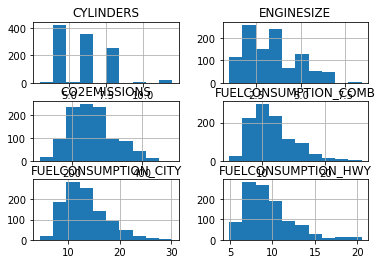

In [45]:
# Plotting these features
viz = d1[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
viz.hist()
plt.show()

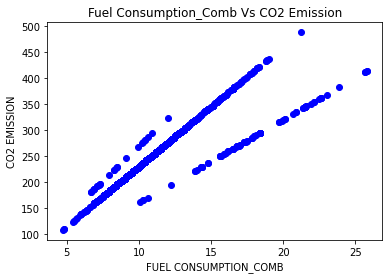

In [46]:
# Plotting each of these features with respect to the CO2 Emission
# To see their linear relationship

plt.scatter(d1.FUELCONSUMPTION_COMB, d1.CO2EMISSIONS, color = 'b')
plt.xlabel('FUEL CONSUMPTION_COMB')
plt.ylabel('CO2 EMISSION')
plt.title('Fuel Consumption_Comb Vs CO2 Emission')
plt.show()

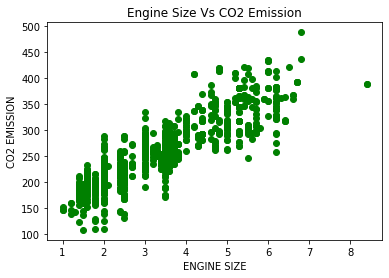

In [47]:
plt.scatter(d1.ENGINESIZE, d1.CO2EMISSIONS, color = 'g')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.title('Engine Size Vs CO2 Emission')
plt.show()

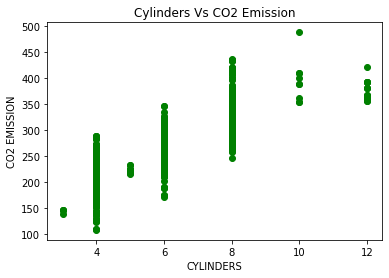

In [48]:
plt.scatter(d1.CYLINDERS, d1.CO2EMISSIONS, color = 'g')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSION')
plt.title('Cylinders Vs CO2 Emission')
plt.show()

In [49]:
# Split the data set into test and train set
# 20% - Test set
# 80% - Train set

num = np.random.rand(len(data)) < 0.8
train_set = d1[num]
test_set = d1[~num]

## SIMPLE REGRESSION

### MODEL 1

In [50]:
# Simple Regression Model - 1
# Predicting CO2 Emissions with respect to Engine Size

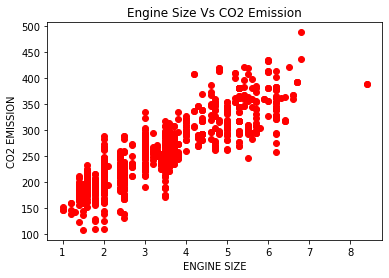

In [51]:
# Train Data Distribution
plt.scatter(d1.ENGINESIZE, d1.CO2EMISSIONS, color = 'r')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.title('Engine Size Vs CO2 Emission')
plt.show()

In [52]:
# Modelling

In [53]:
from sklearn import linear_model as lm

reg = lm.LinearRegression()
train_x = np.asanyarray(train_set[['ENGINESIZE']])
train_y = np.asanyarray(train_set[['CO2EMISSIONS']])
reg.fit(train_x,train_y)

# Getting the co-efficients of the best fit line as a result of training the model
print('Slope or Gradient:',reg.coef_) # Slope of the best fit line
print('Intercept:',reg.intercept_) # Intercept of the best fit line

Slope or Gradient: [[39.50721124]]
Intercept: [124.41573985]


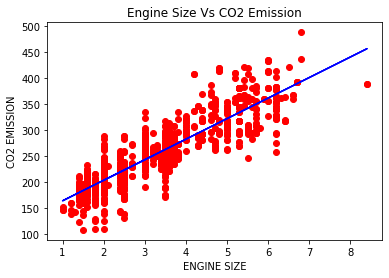

In [54]:
# Plotting the best fit line over the data
plt.scatter(d1.ENGINESIZE, d1.CO2EMISSIONS, color = 'r')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-b')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.title('Engine Size Vs CO2 Emission')
plt.show()

In [55]:
# Evaluation

In [56]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_set[['ENGINESIZE']])
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print('Mean Absolute Error:',np.mean(np.absolute(test_y_ - test_y)))
print('Mean Sqaured Error:',np.mean((test_y_ - test_y)**2))
print('R2-Score:',r2_score(test_y, test_y_))

Mean Absolute Error: 22.88431252357796
Mean Sqaured Error: 916.3524621287424
R2-Score: 0.7480058802627569


### MODEL 2

In [57]:
# Simple Regression Model - 2
# Predicting CO2 Emissions with respect to Fuel Consumption_Comb

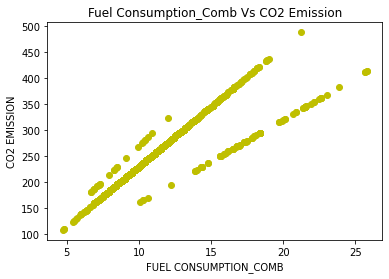

In [58]:
# Visualizing the linear relationship of the data

plt.scatter(d1.FUELCONSUMPTION_COMB, d1.CO2EMISSIONS, color = 'y')
plt.xlabel('FUEL CONSUMPTION_COMB')
plt.ylabel('CO2 EMISSION')
plt.title('Fuel Consumption_Comb Vs CO2 Emission')
plt.show()

In [59]:
# Modelling

In [60]:
from sklearn import linear_model as lm

reg = lm.LinearRegression()
train_x = np.asanyarray(train_set[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train_set[['CO2EMISSIONS']])
reg.fit(train_x,train_y)

# Getting the co-efficients of the best fit line as a result of training the model
print('Slope or Gradient:',reg.coef_) # Slope of the best fit line
print('Intercept:',reg.intercept_) # Intercept of the best fit line

Slope or Gradient: [[16.47708013]]
Intercept: [66.27312629]


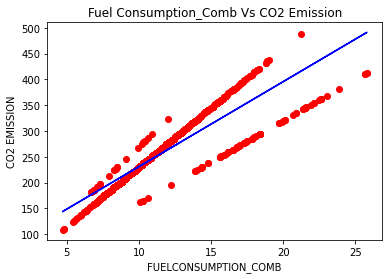

In [61]:
# Plotting the best fit line over the data
plt.scatter(d1.FUELCONSUMPTION_COMB, d1.CO2EMISSIONS, color = 'r')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-b')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2 EMISSION')
plt.title('Fuel Consumption_Comb Vs CO2 Emission')
plt.show()

In [62]:
# Evaluation

In [63]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_set[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print('Mean Absolute Error:',np.mean(np.absolute(test_y_ - test_y)))
print('Mean Sqaured Error:',np.mean((test_y_ - test_y)**2))
print('R2-Score:',r2_score(test_y, test_y_))

Mean Absolute Error: 21.185317216488734
Mean Sqaured Error: 961.5474510135967
R2-Score: 0.7355773967793205


## MULTIPLE REGRESSION

### MODEL 1

In [64]:
from sklearn import linear_model as lm

reg = lm.LinearRegression()
train_x = np.asanyarray(train_set[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train_set['CO2EMISSIONS'])
reg.fit(train_x, train_y)

# Obtain the co-efficients
print('Co-Efficients:', reg.coef_)
print('Intercept:',reg.intercept_)

Co-Efficients: [11.48796805  6.73004253  9.9733781 ]
Intercept: 63.86811844730801


In [65]:
# Predicting the values
x_test = np.asanyarray(test_set[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test_set['CO2EMISSIONS'])
y_pred = reg.predict(x_test)

In [66]:
# Computing the Mean Squared Error
MSE = np.mean((y_pred-y_test)**2)
print('Residual Mean Squared Error:', MSE)

Residual Mean Squared Error: 641.4658211446271


In [67]:
# Computing Variance Score
var_score = reg.score(x_test, y_test)
print('Variance Score:',var_score)

Variance Score: 0.8235988643874481


### MODEL 2

In [69]:
from sklearn import linear_model as lm

reg = lm.LinearRegression()

train_x = np.asanyarray(train_set[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train_set['CO2EMISSIONS'])
reg.fit(train_x, train_y)

# Computing the co-efficients
print('Co-effients:\n',reg.coef_)
print('Intercept:',reg.intercept_)

Co-effients:
 [11.54371232  6.49387842  6.04498083  3.7536895 ]
Intercept: 64.60808770653409


In [71]:
# Predicting 
x_test = np.asanyarray(test_set[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y_test = np.asanyarray(test_set['CO2EMISSIONS'])
y_pred = reg.predict(x_test)

In [72]:
# Computing Mean Square Error
MSE = np.mean((y_pred-y_test)**2)
print('Mean Squared Error:',MSE)

Mean Squared Error: 640.4215360642991


In [73]:
# Computing variance Score
var_score = reg.score(x_test, y_test)
print('Variance Score:', var_score)

Variance Score: 0.8238860395852543
